# Ejercicio práctica examen

Sofía Correa Busquets

Daniel Ríos

Matías José Mercandino

# 1. Carga de datos

Carga a un DataFrame de pandas los datos contenidos en [este link](https://www.kaggle.com/datasets/deepcontractor/unicorn-companies-dataset). Éste es un dataset de empresas 'unicornio' a contar del 2022, que incluye su valoración en la bolsa, los inversores que tiene, y otras características afines.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Limpieza de datos

¿Hay valores nulos en los datos? ¿Cuántos son? ¿Se concentran en alguna columna en particular? ¿Hay alguna otra regularidad que puedas encontrar entre ellos?

En base a la naturaleza de los valores nulos que encontraste, propón, defiende e implementa la mejor estrategia de eliminación o imputación.

¿Hay datos repetidos en la base? ¿Cuáles y cuántos son?

Elimina los datos repetidos. Luego de llevar a cabo este proceso, ¿qué puedes concluir sobre la calidad del dataset en general? ¿Qué tan confiable es la recopilación de estos datos? ¿Qué tan rico es el análisis que 

# 3. Preprocesamiento

Evalúa si cada una de las columnas está formateada en el mejor tipo de dato para los valores que contiene. De no ser así, adapta los tipos de dato a tu criterio.

# 4. Análisis

## 4.1 Top 5

Grafica las 5 compañías con mayor valorización del dataset, usando mínimo 2 tipos de gráfico. ¿Cuál es una mejor visualización para este dato? ¿Por qué?

Para las mismas compañías, lleva a cabo el mismo proceso visualizando su recaudación desde el año en el que se fundaron.

## 4.2 Industrias

Con un solo *scatter plot*, grafica la relación de cada **empresa** entre cantidad de inversores y valorización.

Con un solo *scatter plot*, grafica la relación de cada **industria** entre cantidad de inversores y valorización.

¿En cuál de los dos gráficos ves una tendencia más fuerte? ¿Puedes ver algún efecto de "arrastre", donde el éxito de una industria haya aumentado la valorización de las compañías que la comprenden, independiente de la cantidad de inversionistas de esa propia compañía?

## 4.3 Ciudades

Cuenta cuántos unicornios hay en cada ciudad representada en el dataset.

Genera 5 intervalos relevantes de cantidad de unicornios por cuidad, que representen "muchos unicornios", "varios unicornios", "cantidad media de unicornios", "pocos unicornios", y "casi ningún unicornio".

Calcula la valoración promedio para cada uno de esos intervalos. Luego, grafica tus resultados.

¿Se ve una relación fuerte entre la cantidad de unicornios de la ciudad y la valoración promedio? En otras palabras, ¿le va en general mejor a un unicornio, si muchos otros unicornios ya "abrieron camino" en su sector geográfico?

# Desarrollo 


## 1. carga de datos
para el final, obtener los datos de financial stage generarlos aleatoriamente

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv('/content/Unicorn_Companies.csv')

In [9]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


## 2 Limpieza de datos


In [11]:
# Buscando valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


No existen valores nulos.
Ahora buscando valores duplicados

In [12]:
df.drop_duplicates()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Timescale,$1,2/22/2022,United States,New York,Internet software & services,"New Enterprise Associates, Benchmark, Two Sigm...",2015,$181.06M,None,7,2,None
1033,Scalapay,$1,2/23/2022,Italy,Milan,Fintech,"Fasanara Capital, Tiger Global Management, Bal...",2019,$700M,None,10,2,None
1034,Omada Health,$1,2/23/2022,United States,San Francisco,Health,"U.S. Venture Partners, dRx Capital, Andreessen...",2011,$449.72M,None,30,6,None
1035,BlueVoyant,$1,2/23/2022,United States,New York,Cybersecurity,"8VC, Liberty Strategic Capital, Eden Global Pa...",2017,$525.5M,None,6,2,None


No existen duplicados dentro de la data, por lo que la data mantiene su integridad original

Ahora solo para mejorar el manejo del data set y los gráficos, se convertiran los valores de 'VALUATION' a numero

## 3. preprocesamiento

In [13]:
df["Valuation ($B)"]=df["Valuation ($B)"].str.replace("$","")
df['Valuation ($B)']=pd.to_numeric(df['Valuation ($B)'],errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   float64
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1037 non-null   object 
 7   Founded Year       1037 non-null   object 
 8   Total Raised       1037 non-null   object 
 9   Financial Stage    1037 non-null   object 
 10  Investors Count    1037 non-null   object 
 11  Deal Terms         1037 non-null   object 
 12  Portfolio Exits    1037 non-null   object 
dtypes: float64(1), object(12)
memory usage: 105.4+ KB


Cambiando de tipo de dato a date joined

In [16]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Company            1037 non-null   object        
 1   Valuation ($B)     1037 non-null   float64       
 2   Date Joined        1037 non-null   datetime64[ns]
 3   Country            1037 non-null   object        
 4   City               1037 non-null   object        
 5   Industry           1037 non-null   object        
 6   Select Inverstors  1037 non-null   object        
 7   Founded Year       1037 non-null   object        
 8   Total Raised       1037 non-null   object        
 9   Financial Stage    1037 non-null   object        
 10  Investors Count    1037 non-null   object        
 11  Deal Terms         1037 non-null   object        
 12  Portfolio Exits    1037 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 105.

## 4. Analisis


In [21]:
#1 top 5

top5=df.groupby('Company')['Valuation ($B)'].sum().sort_values().tail(5)

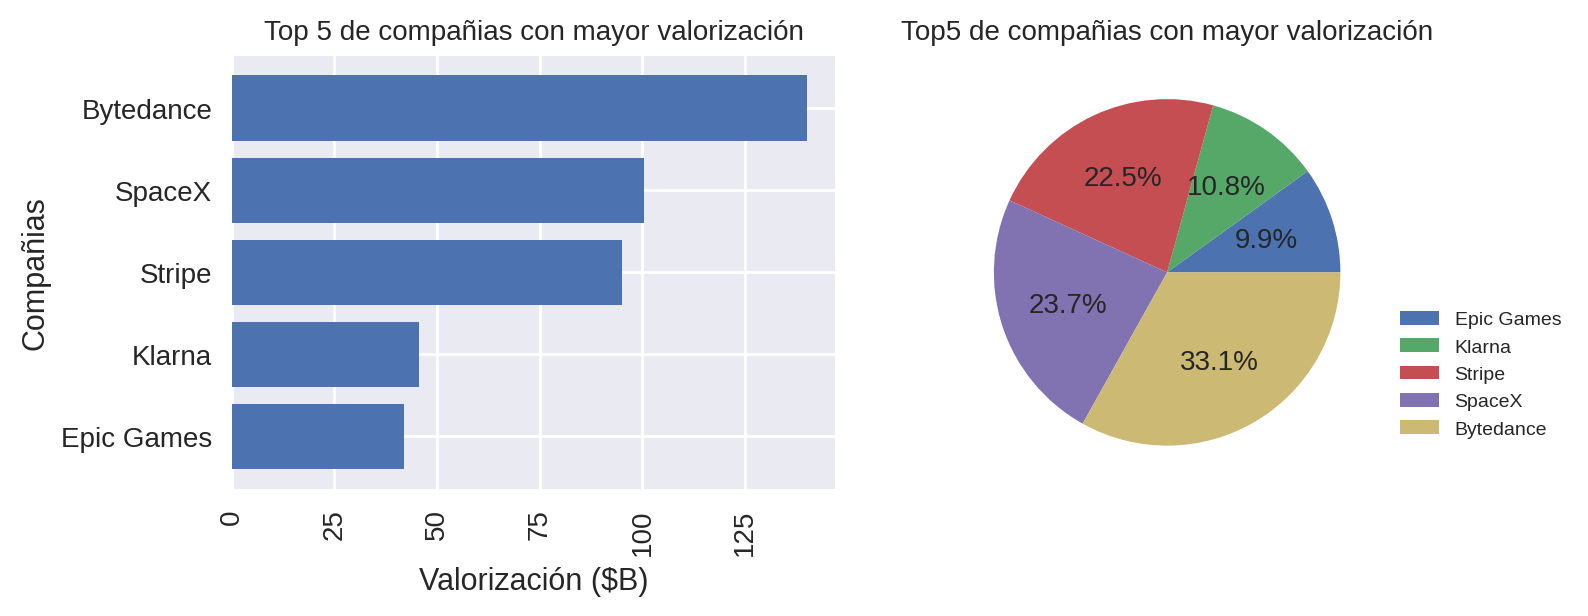

In [30]:
#figura 1
fig = plt.figure(dpi=200)
 #para ajustar los gráficos
plt.style.use('seaborn')
ax1 = fig.add_subplot(2,2,1)
ax1.barh(top5.index,top5.values)
ax1.set_xlabel('Valorización ($B)')
ax1.set_ylabel('Compañias')
ax1.set_title('Top 5 de compañias con mayor valorización',fontsize=10)
plt.xticks(rotation=90)


ax2=fig.add_subplot(2,2,2)
ax2.pie(top5.values,autopct="%.1f%%")
ax2.legend(top5.index,loc=[1.02,0.1],fontsize=7)
ax2.set_title('Top5 de compañias con mayor valorización',fontsize=10)
fig.tight_layout()


#4.2 industrias


In [44]:
import plotly.express as px

In [48]:
df['Investors Count']=pd.to_numeric(df['Investors Count'],errors='coerce')

In [49]:
fig = px.scatter(df, x='Investors Count',
                 y='Valuation ($B)',
                 color='Company'
                )
fig.update_layout(showlegend=True,title_text='Valorización vs cantidad de inversores por empresa')
fig.show()